In [198]:
import importlib
import phantom
import matplotlib.pyplot
import Glinear
import setMask
import numpy
import scipy.ndimage
import FBP
import MLEM
importlib.reload(phantom)
importlib.reload(MLEM)


<module 'MLEM' from '/home/studen/software/src/simulPET/MLEM.py'>

In [377]:
nx=100
ny=100
na=90
nb=100
mask=setMask.set_mask(nx,ny,1)
G=Glinear.sys_matrix(nx,ny,nb,na,mask)

#phantom
fphantom=phantom.generatePhantom("phantom_0_rw_0p6.out",100,100,3000,30)
fpoint=numpy.zeros([nx,ny])
npts=9
fpoint[50,70]=0.25*npts;
fpoint[50,71]=0.25*npts;
fpoint[51,70]=0.25*npts;
fpoint[51,71]=0.25*npts;

fbkg=phantom.generatePhantom("bkg.out",100,100,2000,30)

fimage=fbkg+fphantom
sino=G.dot(fimage.ravel()).reshape(na,nb)

#measurement error
sino1=scipy.ndimage.gaussian_filter(numpy.transpose(sino),[2,0.1])

#filtered backprojection
im1=FBP.FBP(G,sino,nx,na)
im2=FBP.FBP(G,numpy.transpose(sino1),nx,na)


#rekonstruirana slika z MLEM
G1=numpy.transpose(G)

im4=FBP.BP(G,numpy.transpose(sino1),nx)
imold=mask
niter=0



In [378]:
#ponavljaj dokler nisi zadovoljen
for i in numpy.arange(100):
    im3=MLEM.MLEM(G, G1, numpy.transpose(sino1), imold, nx, na, nb)
    imold=im3
    niter+=1

Text(0.5, 1.0, 'MLEM: 100')

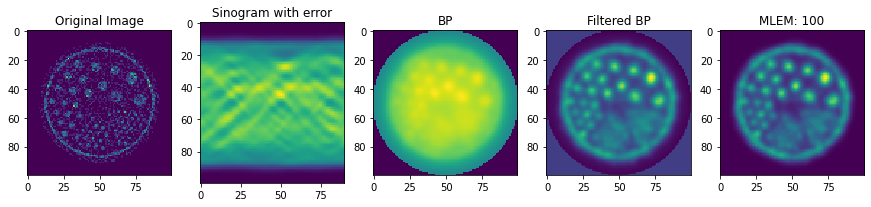

In [379]:
figure, axis = matplotlib.pyplot.subplots(1, 5,figsize=(15,15))
axis[0].imshow(fimage,interpolation='none')
axis[0].set_title("Original Image")
axis[1].imshow(sino1,interpolation='none')
axis[1].set_title("Sinogram with error")
axis[2].imshow(im4,interpolation='none')
axis[2].set_title("BP")
axis[3].imshow(numpy.real(im2),interpolation='none')
axis[3].set_title("Filtered BP")
axis[4].imshow(im3,interpolation='none')
axis[4].set_title("MLEM: {}".format(niter))


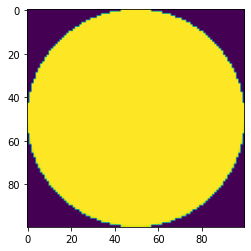

In [182]:
matplotlib.pyplot.imshow(G1.dot(numpy.ones([na,nb]).ravel()).reshape(nx,ny))